## Лабораторная работа. Знакомство с библиотеками для анализа данных

### О задании

Лабораторная работа направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Для каждой задачи приведите примеры использования реализованных функций.

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [2]:
import numpy as np

**(0.25 балла) Задание 1.** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```indices1``` и ```indices2``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[indices1[0], indices2[0]], ... , X[indices1[N-1], indices2[N-1]]]```

In [388]:
X = np.arange(1,17)
X = X.reshape(4,4)
indices1 = [0,3.6,2,3]
indices2 = [3,2,1,0]
X

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [69]:
def construct_array(X, indices1, indices2):
    """
    Функция возвращает значения элементов в матрице по координатам из двух массивов индексов.
    """
    N = np.amin(X.shape)
    rows = np.array(indices1, dtype=np.intp)
    columns = np.array(indices2, dtype=np.intp)
    if (rows.max() > N-1) or (columns.max() > N-1):
        print("Index is bigger than shape of matrix. Please change the list of indices.")
        return
    return X[rows, columns]

construct_array(X, indices1, indices2)

array([ 4, 15, 10, 13])

**(0.25 балла) Задача 2.** Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [70]:
X = np.arange(1,17)
X = X.reshape(4,4)
Y = np.arange(1,17)
Y = Y.reshape(8,2)

In [71]:
def detect_identic(X, Y):
    """
    Функция на вход принимает два массива X и Y, а возвращает True если они равны и False - иначе
    """
    return np.array_equal(X, Y)

detect_identic(X, Y)

False

**(0.25 балла) Задание 3.** Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [390]:
X = np.arange(1,19).reshape(1,6,3)

In [391]:
def mean_channel(X):
    """
    Функция на вход принимает цветное изображение X (трехмерный вектор размера (n, m, 3)) 
    и возвращает среднее значение по трём каналам (вектор длины 3).
    """
    m = X.shape[0]
    n = X.shape[1]
    X = X.reshape(m*n,3)
    return np.mean(X, axis=0)
mean_channel(X)

array([ 8.5,  9.5, 10.5])

**(0.25 балла) Задание 4.** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [89]:
X = np.arange(0,12).reshape((3, 4))
a = 7.6
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [90]:
def nearest_value(X, a):
    """
    Функция принимает на вход матрицу X и некоторое число a и возвращает ближайший к числу элемент матрицы.
    """
    X = X.ravel()
    index = (np.abs(X - a)).argmin()
    return X[index]
nearest_value(X, a)

8

**(0.5 балла) Задача 5.** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй - второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [180]:
x = np.arange(0,16)
y = np.arange(13,25)
x.shape

(16,)

In [181]:
def construct_matrix(x, y):
    """
    На вход функция берет два одномерных массива. 
    Если массивы разной длины, короткий массив добивается нулями.
    """
    l = x.shape[0] - y.shape[0]
    if l == 0:
        x = x.reshape(x.shape[0],1)
        y = y.reshape(y.shape[0],1)
        M = np.concatenate((x,y), axis = 1)
        
    elif l < 0:
        z = np.zeros((1,np.abs(l))).ravel()
        x = np.append(x,z)
        x = x.reshape(x.shape[0], 1)
        y = y.reshape(y.shape[0], 1)
        M = np.concatenate((x,y), axis = 1)
        
    else :
        z = np.zeros((1,l)).ravel()
        y = np.append(y,z)
        x = x.reshape(x.shape[0], 1)
        y = y.reshape(y.shape[0], 1)
        M = np.concatenate((x,y), axis = 1)
        
    return M

construct_matrix(x, y)

array([[ 0., 13.],
       [ 1., 14.],
       [ 2., 15.],
       [ 3., 16.],
       [ 4., 17.],
       [ 5., 18.],
       [ 6., 19.],
       [ 7., 20.],
       [ 8., 21.],
       [ 9., 22.],
       [10., 23.],
       [11., 24.],
       [12.,  0.],
       [13.,  0.],
       [14.,  0.],
       [15.,  0.]])

**(0.5 балла) Задание 6.** Реализуйте функцию, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

Например, из ```[1, -5, 3]``` получить ```[1, 0, -5, 0, 3]```

In [190]:
x = np.arange(1,16)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [194]:
def add_zeros(x):
    """
    Функция создает массив индексов и с помощью np.insert вставляет ноль перед каждым индексом
    """
    N = x.shape[0]
    index = list(range(1,N))
    x = np.insert(x,index,0)
    return x

add_zeros(x)

array([ 1,  0,  2,  0,  3,  0,  4,  0,  5,  0,  6,  0,  7,  0,  8,  0,  9,
        0, 10,  0, 11,  0, 12,  0, 13,  0, 14,  0, 15])

**(0.75 балла) Задание 7.** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция должна возвращать ```None```.

In [206]:
X = np.arange(0,50).reshape(5,10)
X

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [208]:
def nonzero_product(X):
    """
    Функция берет элементы основной диагонали, записывает в массив, удаляет в нем нули
    и перемножает. Если массив пустой - возвращает None
    """
    diag = np.diagonal(X)
    diag_0 = np.delete(diag, np.where(diag == [0]))
    if diag_0.shape[0] == 0:
        return None
    else:
        return np.prod(diag_0)

nonzero_product(X)

351384

**(0.75 балла) Задание 8.** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция должна возвращать ```None```.

In [393]:
X = np.array([11,0,3,0,0,0,1,2,5,7,0,9,7,0,11,0,12,1])
np.where(X==0)
X.shape

(18,)

In [394]:
def max_element(X):
    """
    Функция создает массив индексов нужных элементов, проверяет,что не вышли за размер массива и
    возвращает максимальный по значению элемент
    """
    N = X.shape[0]
    index = np.where(X==0)[0]
    nxt = np.ones(index.shape, dtype=int)
    index = index+nxt
    index = np.delete(index, np.where(index >= [N]))
    return np.amax(X[index])
max_element(X)

12

**(0.75 балла) Задание 9.** Реализуйте функцию, принимающую на вход матрицу ```X``` и возвращающую все её уникальные строки в виде матрицы.

In [242]:
X = np.array([[1, 0, 1], [1, 0, 1],[1, 0, 1],[2, 0, 2], [3, 0, 3], [4, 4, 4]])
X

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [2, 0, 2],
       [3, 0, 3],
       [4, 4, 4]])

In [245]:
def get_unique_rows(X):
    """
    Функция принимает на вход матрицу X и возвращает все её уникальные строки в виде матрицы.
    """
    return np.unique(X, axis=0)
get_unique_rows(X)

array([[1, 0, 1],
       [2, 0, 2],
       [3, 0, 3],
       [4, 4, 4]])

**(0.75 балла) Задача 10.** Реализуйте функцию, каторая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

In [271]:
#X = np.array([[1, np.nan, 1], [1, 0, 1],[np.nan, 0, 1],[2, 0, 2], [np.nan, 0, 3], [4, 4, 4]])
X = np.empty((6,3))
X[:] = np.NaN
Y = np.nan_to_num(X,nan = 0)
X

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [272]:
def replace_nans(X):
    """
    Функция создает матрицу Y для расчета среднего арифметического, заменяя nan на 0.
    Затем заменяет в матрице Х nan на среднее.
    """
    Y = np.nan_to_num(X,nan = 0)
    X = np.nan_to_num(X,nan = Y.mean())
    return X
replace_nans(X)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

**(1 балл) Задача 11.** Напишите функцию, генерирующую [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(x_1, ... , x_n)$.

В этом задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).

In [289]:
x = np.array([1,2,1,2])
x

array([1, 2, 1, 2])

In [290]:
def vander(x):
    """
    В задаче не уточнено,поэтому функция делает квадратную матрицу Вандермонда с помощью возведения в степень
    """
    n = x.shape[0]
    m = np.arange(0,n).reshape(n,1)
    return x**m
vander(x)

[[0]
 [1]
 [2]
 [3]]


array([[1, 1, 1, 1],
       [1, 2, 1, 2],
       [1, 4, 1, 4],
       [1, 8, 1, 8]])

**(1 балл) Задача 12.** Даны две вещественные матрицы ```X``` и ```Y``` с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных [косинусных коэффициентов](https://en.wikipedia.org/wiki/Cosine_similarity) между всеми $X_i и Y_j$, где $X_i$ - $i$-ая строка матрицы $X$, а $Y_j$ - $j$-ая строка матрицы $Y$. 

В этом задании **запрещается** пользоваться готовыми реализациями, а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html), [np.sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) и [np.power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

In [328]:
X = np.array([[1, 0, 1], [1, 0, 1],[1, 0, 1],[2, 0, 2], [3, 0, 3], [4, 4, 4]])
Y = np.array([[1, 0, 1], [1, 0, 1], [3, 0, 3], [4, 4, 4]])

In [327]:
def cosin_sim(X, Y):
    """
    Функция расчитывает косинусное расстояние по формуле, использует np.outer так как размерности матриц разные
    """
    Y_t = np.rot90(Y.copy())
    return X.dot(Y_t)/np.outer(np.linalg.norm(X, axis=1),
                                  np.linalg.norm(Y, axis=1))
cosin_sim(X, Y)

array([[1.        , 1.        , 1.        , 0.81649658],
       [1.        , 1.        , 1.        , 0.81649658],
       [1.        , 1.        , 1.        , 0.81649658],
       [1.        , 1.        , 1.        , 0.81649658],
       [1.        , 1.        , 1.        , 0.81649658],
       [0.81649658, 0.81649658, 0.81649658, 1.        ]])

**(1 балл) Задача 13.** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение.

Для тестирования можно сгенерировать с помощью метода [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) случайную матрицу и проверить на ней работу метода.

Убедитесь, что в функции не будет происходить деления на ноль, если происходит деление на ноль, то верните **None**.

In [370]:
X = np.random.randint(4, size=(2, 4))
X

array([[2, 3, 1, 2],
       [0, 0, 3, 2]])

In [372]:
def scale(X):
    """
    Функция рассчитывает стандартное отклонение по столбцам и заменяет 0 на nan.
    Из каждого столбца вычитаем среднее по столбцу и делим на std.
    """
    std = np.std(X, axis = 0)
    std[std == 0] = np.nan
    return (X - X.mean(axis = 0))/std


scale(X)

array([[ 1.,  1., -1., nan],
       [-1., -1.,  1., nan]])

**(1 балл) Задача 14.** Пусть $N=1000$. Повторите $N$ раз следующий эксперимент: сгенерируйте две матрицы размера $N×N$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? 

При решение задачи для повторения экспериментов воспользуйтесь [list comprehension](https://habrahabr.ru/post/30232/), а также [tqdm_notebook](https://habrahabr.ru/post/276725/) - для отслеживания прогресса.

In [3]:
from tqdm.notebook import tqdm

def create_matrix(N):
    """
    Функция создает массив с максимальными элементами матрицы, полученной в результате умножения двух сгенерированных
    из нормального распределения матриц размерностью N x N. Массив наполняется в течение N экспериментов.
    Функция возвращает среднее и 95 квантиль массива.
    """
    max_element = [np.amax((np.random.standard_normal(size=(N, N)))*(np.random.standard_normal(size=(N, N)))) for i in tqdm(range(N))]
    return (np.array(max_element).mean(), np.quantile(np.array(max_element), 0.95))
create_matrix(1000)

(12.138547101750893, 14.370768058960456)

### Аналитика данных с Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

Загрузите таблицу с данными из ```articles.csv```. Удалите записи, в которых присутствуют пропуски.


**(0.5 балла) Задача 15.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('articles.csv')
df.head()

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author        date  year  month  \
0                     Carl Hulse  2016-12-31  2016     12   
1  Benjamin Mueller and Al Baker  2017-06-19  2017      6   
2                   Margalit Fox  2017-01-06  2017      1   
3               William McDonald  2017-04-10  2017      4   
4                  Choe Sang-Hun  2017-01-02  2017      1   

                                             content  
0  WASHINGTON  —   Congressional Republicans have...  
1  After the bullet shells get counted, the blood...  
2  When Walt Disney’s “Bambi” opened in 1942, cri...  
3  Death may be the great equalizer, but it isn’t...  
4  SEOUL, South Korea  —   North Korea’s leader, ...

In [11]:
df.shape

(50000, 8)

In [12]:
df.dropna(inplace=True)
df.shape

(43694, 8)

In [108]:
# определите количество различных издательств в таблице;
df["publication"].value_counts()

Breitbart           23781
New York Times       7767
CNN                  7025
Business Insider     4950
Atlantic              171
Name: publication, dtype: int64

In [109]:
# найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
df["date"] = pd.to_datetime(df["date"])
df[df["date"].between(pd.to_datetime('2016-06-01'), pd.to_datetime('2016-12-31'))].count()["id"]

17159

In [110]:
# посчитайте распределение статей автора Tom Ciccotta по годам;
df[df["author"] == "Tom Ciccotta"].groupby("year").agg({"author": 'count'})

author
year        
2016     124
2017     132

In [111]:
# найдите месяц, в котором было наибольшее число статей;
df["month"].value_counts()
#Январь

1     5235
4     5170
3     5138
2     4678
6     4165
5     4140
8     2678
7     2677
12    2620
9     2592
11    2341
10    2260
Name: month, dtype: int64

In [112]:
# выпишите 3 первые статьи автора John Hayward в 2016 году.
df[(df["author"] == "John Hayward") & (df["year"] == 2016)].sort_values("date").head(3)

id                                              title publication  \
16861  35600  Indonesian Couple Beaten with Canes for Violat...   Breitbart   
22041  40791  Islamic State Claims Credit For Gun Attack On ...   Breitbart   
27561  46325  Protests Across India Against Saudi Execution ...   Breitbart   

             author       date  year  month  \
16861  John Hayward 2016-01-01  2016      1   
22041  John Hayward 2016-01-01  2016      1   
27561  John Hayward 2016-01-04  2016      1   

                                                 content  
16861  Islamic sharia law was enforced with canes onc...  
22041  The Islamic State has claimed responsibility f...  
27561  Protests over Saudi Arabia’s execution of Shii...

**Работа со строками в датафрейме.**

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 16.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [113]:
pd.Series(pd.unique(df[df["author"].str.contains(".*Faith.*", regex = True)]["author"]))

0     Faith Haleh Robinson
1             Faith Karimi
2     Faith Haleh Robinson
3            Faith Karimi,
4            Faith Karimi 
5           Faith Karimi, 
6             Faith Karimi
7            Faith Karimi 
dtype: object

**(1 балл) Задача 17.**

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [123]:
import string

df["author"] = df["author"].str.lower()
df["author"] = df["author"].str.strip(" ")
df["author"] = df["author"].str.replace('\s+', " ")

df["content"] = df["content"].str.lower()
df["content"] = df["content"].str.strip(" ")
df["content"] = df["content"].str.replace('\s+', " ")

for c in string.punctuation:
    df["author"] = df["author"].str.replace(c, "")
for c in string.punctuation:
    df["content"] = df["content"].str.replace(c, "")

!
"
#
$
%
&
'
(
)
*
+
,
-
.
/
:
;
<
=
>
?
@
[
\
]
^
_
`
{
|
}
~


In [117]:
# Подсчитайте статистику для имени Faith из прошлого задания. 
# Проверьте, что теперь различные способы написания «схлопываются» в один.

pd.Series(pd.unique(df[df["author"].str.contains(".*[Ff]aith.*", regex = True)]["author"]))

0    faith haleh robinson
1            faith karimi
dtype: object

In [162]:
df["content"] = df["content"].str.replace('’', "")
df["content"] = df["content"].str.replace('”', "")
df["content"] = df["content"].str.replace('“', "")
df["content"] = df["content"].str.replace('—', "")

In [165]:
df["content"].head(20)

0     washington  congressional republicans have a n...
1     after the bullet shells get counted the blood ...
2     when walt disneys bambi opened in 1942 critics...
3     death may be the great equalizer but it isnt n...
4     seoul south korea  north koreas leader kim sai...
5     london  queen elizabeth ii who has been battli...
6     beijing  president tsai of taiwan sharply crit...
7     danny cahill stood slightly dazed in a blizzar...
8     just how is hillary kerr the founder of a digi...
9     angels are everywhere in the muñiz familys apa...
10    with donald j trump about to take control of t...
11    thompsons tex  can one of the most promising  ...
12    west palm beach fla  when donald j trump rang ...
13    this article is part of a series aimed at help...
14    its the season for family travel and photos  a...
15    finally the second avenue subway opened in new...
16    pages into the journal found in dylann s roofs...
17    mumbai india  it was a bold and risky gamb

**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 18.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [177]:
df.groupby(["author","year"])["year"].count().sort_values(ascending=False).head(20)

author              year
breitbart news      2016    1317
pam key             2016     820
charlie spiering    2016     660
alex swoyer         2016     584
daniel nussbaum     2016     532
awr hawkins         2016     525
john hayward        2016     521
jerome hudson       2016     482
pam key             2017     457
ian hanchett        2016     429
joel b pollak       2016     417
jeff poor           2016     323
jerome hudson       2017     323
warner todd huston  2016     316
trent baker         2016     280
charlie spiering    2017     268
patrick howley      2016     259
breitbart london    2016     258
frances martel      2016     257
charlie nash        2016     254
Name: year, dtype: int64

**(1 балл) Задача 19.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

**Hint**. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [232]:
# Your code here
date = df.groupby(["publication","date"])[["content"]].count()
date = date.reset_index().rename(columns={"content": "count"})
date[(date["publication"] == "New York Times") & (date["date"] == '2016-12-30')]

publication       date  count
1925  New York Times 2016-12-30      8

In [236]:
date.head()

publication       date  count
0    Atlantic 2016-12-30     19
1    Atlantic 2016-12-31      4
2    Atlantic 2017-01-01      3
3    Atlantic 2017-01-02      2
4    Atlantic 2017-01-03     27

In [233]:
result = pd.merge(df, date, how='left', on=['publication', 'date'])
result[(result["publication"] == "New York Times") & (result["date"] == '2016-12-30')]

id                                              title  \
4754  22589  Doomed Jet Carrying Brazilian Team Reportedly ...   
5110  22995  After Thousands of Broadway Performances, 5 Sh...   
5126  23015  Whitney Houston, Cher, Tina Turner and Donna S...   
5143  23043  Carrie Fisher’s Fans Find Solace in Her Books ...   
5153  23057  Syria, Russia, Mosul: Your Friday Evening Brie...   
6473  24814  California Today: The Stories That Moved Us in...   
6479  24821  4 Trailers That Have Us Excited for 2017 - The...   
7106  25659  Roger Federer Welcomes the End ... Of a Layoff...   

         publication                             author       date  year  \
4754  New York Times   nicholas casey and ewan mackenna 2016-12-30  2016   
5110  New York Times                    erik piepenburg 2016-12-30  2016   
5126  New York Times                    erik piepenburg 2016-12-30  2016   
5143  New York Times                    alexandra alter 2016-12-30  2016   
5153  New York Times  karen zraick and sandra stevenson 2016-12-30  2016   
6473  New York Times                       mike mcphate 2016-12-30  2016   
6479  New York Times                       michael gold 2016-12-30  2016   
7106  New York Times                 christopher clarey 2016-12-30  2016   

      month                                            content  count  
4754     12  the pilot of a plane that crashed late monday ...      8  
5110     12  sunrise sunset swiftly flow the days sing the ...      8  
5126     12  fans of shimmery miniskirts choruses and beefc...      8  
5143     12  i heard someone once say that were only as sic...      8  
5153     12  want to get this briefing by email heres the g...      8  
6473     12  good morning want to get california today by e...      8  
6479     12  a new year brings new movies of course but the...      8  
7106     12  the federer family has shared many a road trip...      8

In [234]:
result.head()

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author       date  year  month  \
0                     carl hulse 2016-12-31  2016     12   
1  benjamin mueller and al baker 2017-06-19  2017      6   
2                   margalit fox 2017-01-06  2017      1   
3               william mcdonald 2017-04-10  2017      4   
4                   choe sanghun 2017-01-02  2017      1   

                                             content  count  
0  washington  congressional republicans have a n...      4  
1  after the bullet shells get counted the blood ...      6  
2  when walt disneys bambi opened in 1942 critics...     21  
3  death may be the great equalizer but it isnt n...     47  
4  seoul south korea  north koreas leader kim sai...     15

### Визуализация

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**(0.5 балла) Задача 20.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

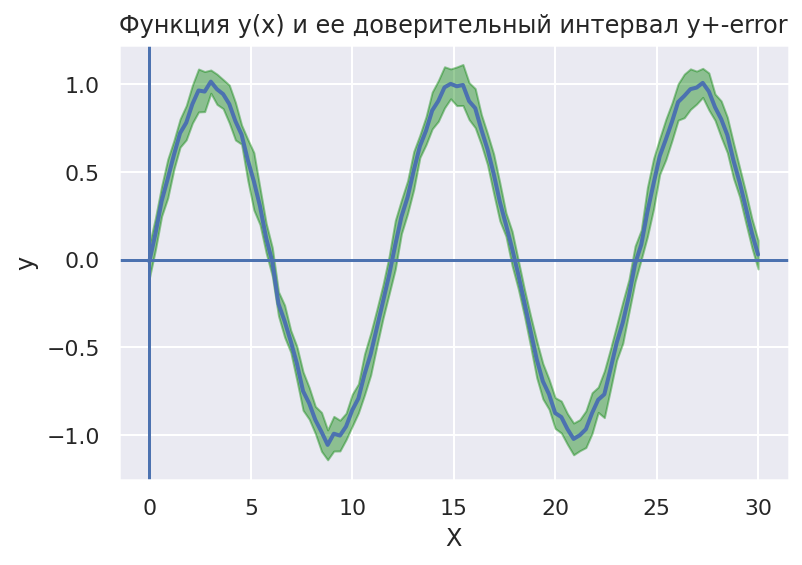

In [7]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

X, y, error = gen_uncertain_data()
plt.plot(X,y,linewidth=2.0)
plt.fill_between(X, y-error, y+error, color='green', alpha=0.4)
#Подписи
plt.xlabel('X')
plt.ylabel('y')
plt.title('Функция y(x) и ее доверительный интервал y+-error')
#сетка
plt.grid(True)
#оси
ax = plt.gca() 
ax.axhline(y=0, color='b')   
ax.axvline(x=0, color='b')
plt.show()

**(0.5 балла) Задача 21.** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).


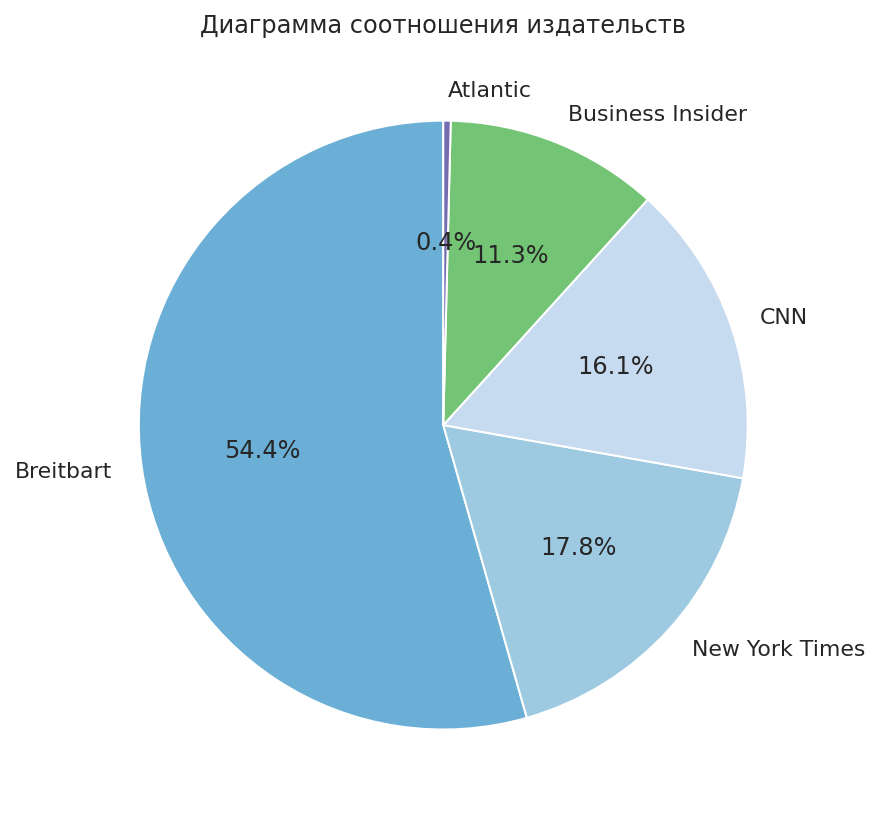

In [13]:
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 3, 9, 12]))
df["publication"].value_counts().plot.pie(figsize=(7, 7),autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Диаграмма соотношения издательств')
plt.ylabel('')
plt.show()

**(0.5 балла) Задача 22.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

In [14]:
df_pub = df.groupby(["publication","year"])["id"].count().sort_values(ascending=False).to_frame()
df_pub = df_pub.reset_index().rename(columns={"id": "count"})

df_pub

publication  year  count
0          Breitbart  2016  16100
1          Breitbart  2017   7606
2     New York Times  2017   4159
3     New York Times  2016   3605
4   Business Insider  2016   3355
5                CNN  2016   2506
6                CNN  2017   2433
7                CNN  2015   2067
8   Business Insider  2017   1595
9           Atlantic  2017    148
10         Breitbart  2015     72
11          Atlantic  2016     23
12               CNN  2014     16
13    New York Times  2015      3
14               CNN  2013      2
15         Breitbart  2013      2
16               CNN  2012      1
17         Breitbart  2014      1

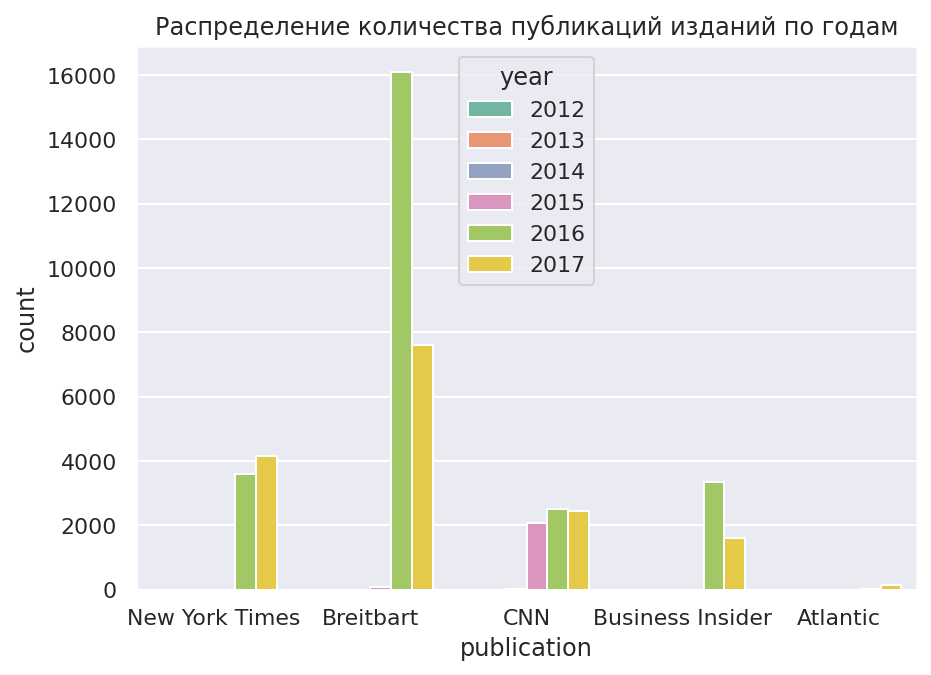

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
plt.title('Pаспределение количества публикаций изданий по годам')
sns.countplot(x='publication', hue='year', data=df[["publication", "year"]], palette="Set2");

**(0.5 балла) Задача 23.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

In [17]:
df["len_title"] = df["title"].str.len()

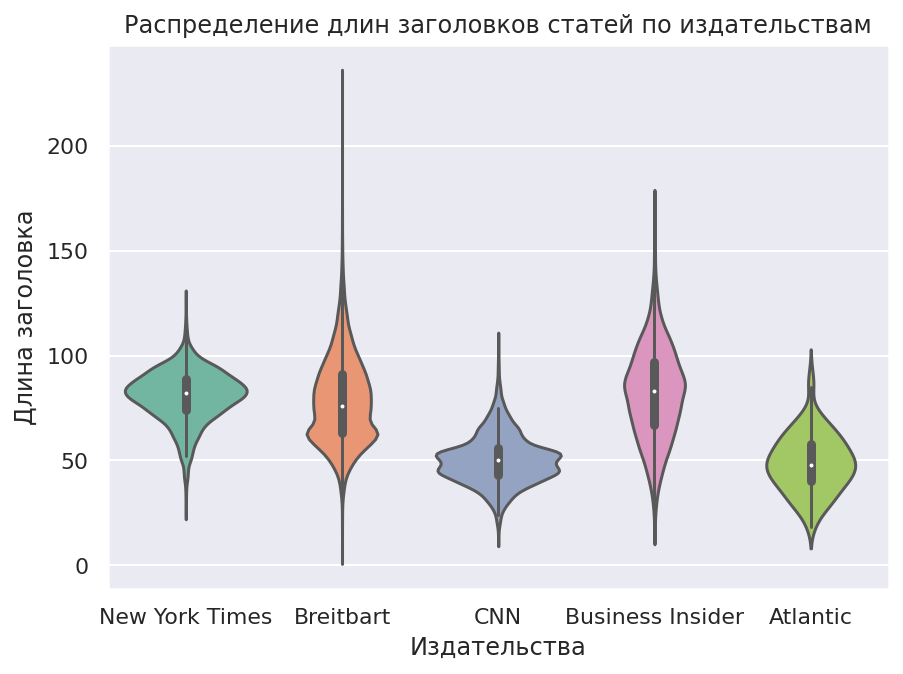

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
plt.title('Распределение длин заголовков статей по издательствам')
sns.violinplot(x='publication', y='len_title', data=df[["publication", "len_title"]], palette="Set2")
plt.xlabel('Издательства')
plt.ylabel('Длина заголовка')
plt.show()